<a href="https://colab.research.google.com/github/Fatima-AH03/cis321/blob/main/data_mining_sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# Import Dataset

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0,51,1,10.0,0,1,1,28568.0,26.0,69
1,1,0,31,1,46.0,0,1,1,36387.0,124.0,184
2,2,0,28,1,30.0,1,2,0,26153.0,152.0,201
3,3,0,52,1,28.0,1,1,0,70363.0,61.0,233
4,4,0,22,1,46.0,0,2,0,2630.0,152.0,155


In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,30,1,28.0,1,2,0,60954.0,152.0,127,0
1,1,0,26,1,6.0,1,2,0,24532.0,152.0,216,0
2,2,0,40,1,0.0,0,1,1,2630.0,47.0,220,0
3,3,0,25,1,8.0,1,2,0,44259.0,152.0,223,0
4,4,1,26,1,28.0,1,2,0,33615.0,152.0,194,0


In [ ]:
train.shape

(70000, 12)

# Check for missing values

In [ ]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing data

# Exploratory Data Analysis(EDA)

In [ ]:
#Checking number of unique rows in each feature

train.nunique().sort_values()

Gender                      2
Driving_License             2
Previously_Insured          2
Vehicle_Damage              2
Response                    2
Vehicle_Age                 3
Region_Code                53
Age                        66
Policy_Sales_Channel      133
Vintage                   290
Annual_Premium          28721
id                      70000
dtype: int64

In [ ]:
train.drop(['id'],axis=1,inplace=True)

In [ ]:
import pandas as pd

def identify_data_types(train, threshold_unique=10):
    categorical_cols = []
    numerical_cols = []

    for col in train.columns:
        if train[col].dtype == 'object' or len(train[col].unique()) <= threshold_unique:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

    return categorical_cols, numerical_cols

# Load your dataset here
# Example: data = pd.read_csv('your_dataset.csv')

# Assuming 'data' is your dataset
categorical_cols, numerical_cols = identify_data_types(train)

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

Numerical Columns:
['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [ ]:
train[numerical_cols].describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,38.468800,26.461986,30701.997086,112.060886,154.219000
std,15.176659,13.160321,17024.290284,54.285368,83.994393
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24508.750000,26.000000,81.000000
50%,36.000000,28.000000,31667.000000,151.000000,153.000000
75%,49.000000,35.000000,39452.250000,152.000000,228.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


# Checking the correlation

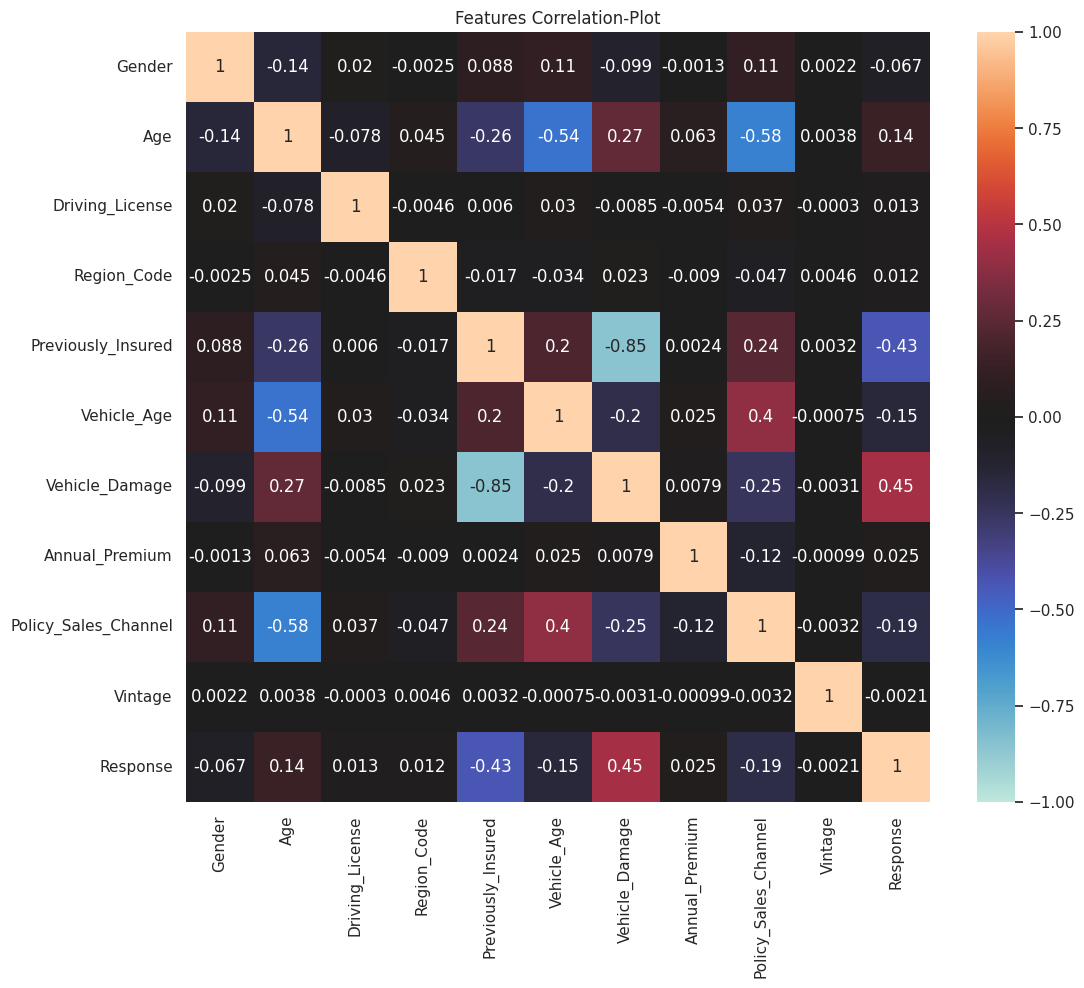

In [ ]:
features = train.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(train[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

# Data Preprocessing

In [ ]:
# Perform dummy encoding
dummy_encoded = pd.get_dummies(train['Vehicle_Age'], prefix='Vehicle_Age')

# Concatenate dummy encoded columns with original dataframe
train = pd.concat([train, dummy_encoded], axis=1)

# Drop the original categorical column
train.drop('Vehicle_Age', axis=1, inplace=True)

print(train)

       Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0           0   30                1         28.0                   1   
1           0   26                1          6.0                   1   
2           0   40                1          0.0                   0   
3           0   25                1          8.0                   1   
4           1   26                1         28.0                   1   
...       ...  ...              ...          ...                 ...   
69995       1   23                1         28.0                   1   
69996       0   41                1         30.0                   1   
69997       1   26                1         41.0                   1   
69998       1   21                1         14.0                   1   
69999       0   31                1         28.0                   0   

       Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                   0         60954.0                 152.0    

In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_1','Vehicle_Age_2','Vehicle_Age_3','Vehicle_Damage','Region_Code','Policy_Sales_Channel']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [ ]:
column_to_transform=['Vehicle_Age_1','Vehicle_Age_2','Vehicle_Age_3']
train[column_to_transform] = train[column_to_transform].replace({True: 1, False: 0})


In [ ]:
train.drop(['Region_Code'],axis=1,inplace=True)

In [ ]:
#Removal of outlier:

for i in [i for i in train.columns]:
    if train[i].nunique()>=12:
        Q1 = train[i].quantile(0.25)
        Q3 = train[i].quantile(0.75)
        IQR = Q3 - Q1
        train = train[train[i] <= (Q3+(1.5*IQR))]
        train = train[train[i] >= (Q1-(1.5*IQR))]
train = train.reset_index(drop=True)
display(train.head())
print('removal of outliers, The dataset had {} samples.'.format(train.shape[0]))

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3
0,0,-0.558019,1,1,0,0.108503,152.0,-0.324060,0,0,1,0
1,0,-0.821583,1,1,0,0.040745,152.0,0.735542,0,0,1,0
2,0,0.100892,1,0,1,0.000000,47.0,0.783165,0,1,0,0
3,0,-0.887474,1,1,0,0.077444,152.0,0.818882,0,0,1,0
4,1,-0.821583,1,1,0,0.057643,152.0,0.473618,0,0,1,0


removal of outliers, The dataset had 68118 samples.


In [ ]:
train

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3
0,0,-0.558019,1,1,0,0.108503,152.0,-0.324060,0,0,1,0
1,0,-0.821583,1,1,0,0.040745,152.0,0.735542,0,0,1,0
2,0,0.100892,1,0,1,0.000000,47.0,0.783165,0,1,0,0
3,0,-0.887474,1,1,0,0.077444,152.0,0.818882,0,0,1,0
4,1,-0.821583,1,1,0,0.057643,152.0,0.473618,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68113,1,-1.019257,1,1,0,0.079182,152.0,0.342656,0,0,1,0
68114,0,0.166784,1,1,0,0.052259,26.0,-0.109758,0,1,0,0
68115,1,-0.821583,1,1,0,0.067078,152.0,-1.467001,0,0,1,0
68116,1,-1.151039,1,1,0,0.072258,152.0,-0.038324,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 10)

In [ ]:
id=test.id

In [ ]:
test=test.drop('id',axis=1)

In [ ]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1', 'Vehicle_Age_2', 'Vehicle_Age_3'],
      dtype='object')

# Test Data

In [ ]:
test.drop(['Region_Code'],axis=1,inplace=True)

In [ ]:
# Perform dummy encoding
dummy_encoded = pd.get_dummies(test['Vehicle_Age'], prefix='Vehicle_Age')

# Concatenate dummy encoded columns with original dataframe
test = pd.concat([test, dummy_encoded], axis=1)

# Drop the original categorical column
test.drop('Vehicle_Age', axis=1, inplace=True)

print(test)

       Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0           0   51                1         10.0                   0   
1           0   31                1         46.0                   0   
2           0   28                1         30.0                   1   
3           0   52                1         28.0                   1   
4           0   22                1         46.0                   0   
...       ...  ...              ...          ...                 ...   
29995       0   42                1         41.0                   0   
29996       1   21                1         47.0                   1   
29997       0   69                1         39.0                   0   
29998       0   45                1         18.0                   1   
29999       1   26                1         27.0                   1   

       Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                   1         28568.0                  26.0    

In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_1','Vehicle_Age_2','Vehicle_Age_3','Vehicle_Damage','Region_Code','Policy_Sales_Channel']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [ ]:
column_to_transform=['Vehicle_Age_1','Vehicle_Age_2','Vehicle_Age_3']
test[column_to_transform] = test[column_to_transform].replace({True: 1, False: 0})

In [ ]:
test

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1,Vehicle_Age_2,Vehicle_Age_3
0,0,0.818667,1,0,1,0.048254,26.0,-1.021240,1,0,0
1,0,-0.498316,1,0,1,0.062800,124.0,0.357617,1,0,0
2,0,-0.695863,1,1,0,0.043761,152.0,0.561448,0,1,0
3,0,0.884517,1,1,0,0.126007,61.0,0.945130,1,0,0
4,0,-1.090958,1,0,0,0.000000,152.0,0.009905,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0.226025,1,0,1,0.064773,124.0,1.580604,1,0,0
29996,1,-1.156807,1,1,0,0.076417,152.0,-0.997260,0,1,0
29997,0,2.003952,1,0,1,0.055570,124.0,1.544634,1,0,0
29998,0,0.423573,1,1,0,0.076981,26.0,0.993091,1,0,0


# Data Modelling and Evaluation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

# Random Forest Classifier

In [ ]:
x_train.dtypes

Gender                    int64
Age                     float64
Driving_License           int64
Previously_Insured        int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Vehicle_Age_1             int64
Vehicle_Age_2             int64
Vehicle_Age_3             int64
dtype: object

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10,
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

# logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Create a scikit-learn pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Fit the pipeline on the training data
pipeline.fit(x_train,y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.835525543159131


# naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a scikit-learn pipeline with StandardScaler and GaussianNB
pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Fit the pipeline on the training data
pipeline.fit(x_train,y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7624192601291838


# support vector

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Create a scikit-learn pipeline with StandardScaler and SVC
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Fit the pipeline on the training data
pipeline.fit(x_train,y_train)

# Predict on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8358191426893717


# Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


# Create and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(x_train,y_train)

# Predict on the test data
y_pred = gb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8446271285965943


# Evaluate Model

In [ ]:
y_pred=model.predict(x_test)

# Classification Report

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14234
           1       0.61      0.07      0.13      2796

    accuracy                           0.84     17030
   macro avg       0.73      0.53      0.52     17030
weighted avg       0.81      0.84      0.78     17030



# sub

In [ ]:
y_pred2 =gb_classifier.predict(test)
type(y_pred2)

numpy.ndarray

In [ ]:
id=np.arange(len(y_pred2))
DataTesting= pd.DataFrame({'id':id, 'Response':y_pred2})

In [ ]:
DataTesting

,id,Response
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
29995,29995,0
29996,29996,0
29997,29997,0
29998,29998,0


In [ ]:
DataTesting.to_csv('last_sub.csv',index=False)